In [2]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.

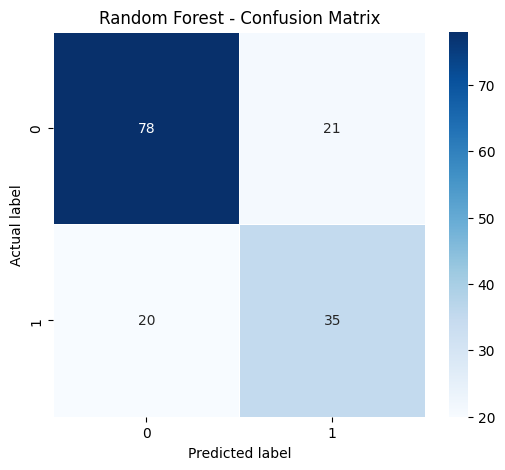

Training SVC...

SVC - Accuracy: 75.32%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



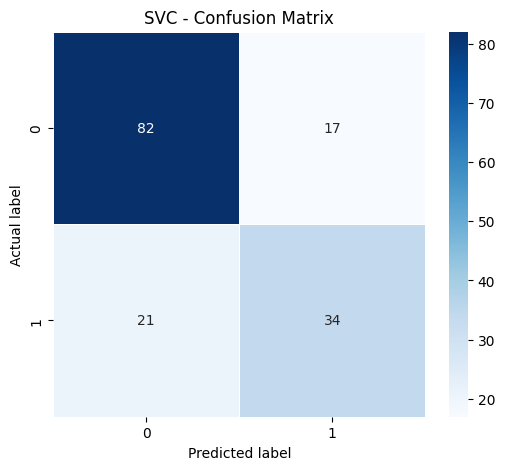

Training KNN...

KNN - Accuracy: 72.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



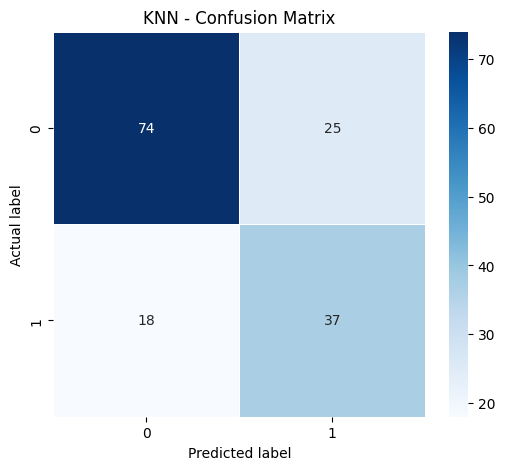

Training Naive Bayes...

Naive Bayes - Accuracy: 75.32%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



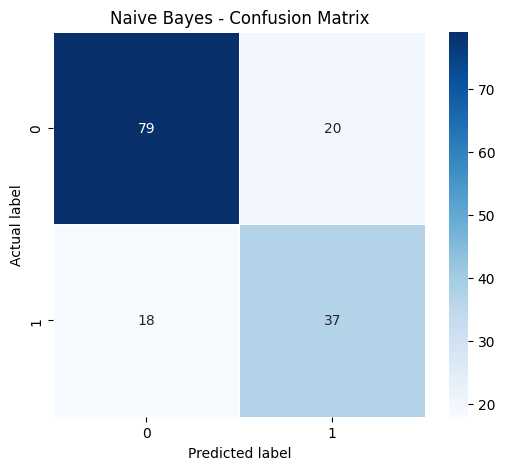

Random Forest: Mean CV Accuracy = 75.40%, Standard Deviation = 4.78%
SVC: Mean CV Accuracy = 76.21%, Standard Deviation = 4.46%
KNN: Mean CV Accuracy = 73.45%, Standard Deviation = 3.44%
Naive Bayes: Mean CV Accuracy = 73.93%, Standard Deviation = 4.67%
Accuracy of MLP: 74.03%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix:
 [[78 21]
 [19 36]]


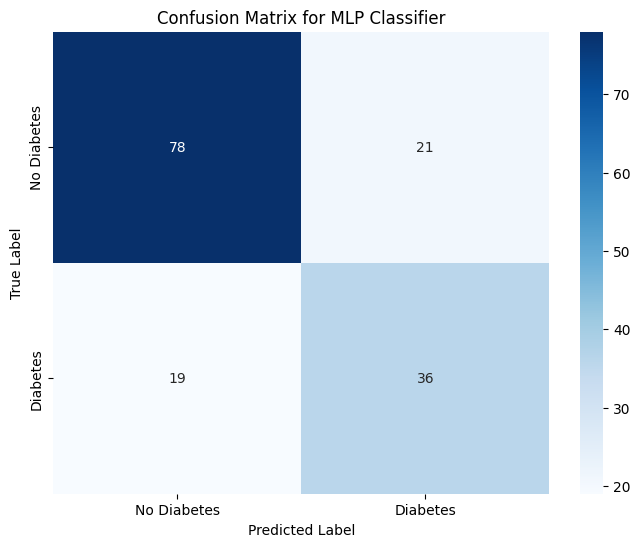

In [3]:
# -*- coding: utf-8 -*-


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('/Users/lohiteeshreddy/Downloads/Rushmitha kommana Data Mining project 1/diabetes.csv') #path to your initial dataset
print(data.head())

print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values per column before processing:")
print(data.isnull().sum())

# Since in medical datasets zeros may represent missing data for some variables,
# replace zeros with NaN in columns where zero is biologically implausible
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Re-check missing values after replacing zeros
print("\nMissing values per column after replacing zeros:")
print(data.isnull().sum())

# Impute missing values with the median of each column
imputer = SimpleImputer(strategy='median')
data[columns_with_zeros] = imputer.fit_transform(data[columns_with_zeros])

# Check to ensure no more missing values
print("\nMissing values per column after imputation:")
print(data.isnull().sum())

# Save the cleaned data if necessary
data.to_csv('cleaned_data.csv', index=False)

# Load the cleaned data
data = pd.read_csv('cleaned_data.csv') #path to cleaned_data.csv dataset

# Separating the features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation to handle any remaining missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

#convert arrays back to DataFrame for better handling in the future
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Save preprocessed data
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Load the preprocessed data
X_train = pd.read_csv('X_train_scaled.csv') # path to  dataset x_train_scaled.csv
X_test = pd.read_csv('X_test_scaled.csv') # path to  dataset x_train_scaled.csv
y_train = pd.read_csv('y_train.csv') # path to  dataset y_train.csv
y_test = pd.read_csv('y_test.csv') # path to  dataset y_test.csv

# Models setup
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train.values.ravel())  # y_train.values.ravel() to convert it into a 1D array
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"\n{name} - Accuracy: {accuracy * 100:.2f}%")
        print(f"Classification Report:\n{report}")

        # Plotting confusion matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
        plt.title(f"{name} - Confusion Matrix")
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()

# Train and evaluate all models
train_and_evaluate(models, X_train, y_train, X_test, y_test)

# Load the preprocessed data
X_train = pd.read_csv('X_train_scaled.csv') #path to X_train_scaled.csv dataset
y_train = pd.read_csv('y_train.csv') # path to  dataset y_train.csv

# Models setup
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Function to perform 10-fold cross-validation
def perform_cross_validation(models, X, y):
    results = {}
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    for name, model in models.items():
        cv_results = cross_val_score(model, X, y.values.ravel(), cv=kf, scoring='accuracy')
        results[name] = cv_results
        print(f"{name}: Mean CV Accuracy = {cv_results.mean()*100:.2f}%, Standard Deviation = {cv_results.std()*100:.2f}%")
    return results

# Perform cross-validation and get results
cv_results = perform_cross_validation(models, X_train, y_train)

# Load your scaled and split data
X_train = pd.read_csv('X_train_scaled.csv') #path to X_trained_scaled.csv dataset
X_test = pd.read_csv('X_test_scaled.csv')#path to X_test_scaled.csv dataset
y_train = pd.read_csv('y_train.csv') # path to your dataset y_train.csv
y_test = pd.read_csv('y_test.csv') # path to your dataset y_test.csv

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)

# Train the model
mlp.fit(X_train, y_train.values.ravel())

# Predict test data
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy of MLP: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for MLP Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()